### Data Science with Cryptocurrencies

Analysis of past returns and building a prediction model

In [112]:
import pandas_datareader.data as reader
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

### Get online cryptocurrency prices

#### Stablecoins and Forks are excluded

In [113]:
# Define the end date as the current time
end = dt.datetime.now()

# Define the start date as four years ago from the current date
start = dt.date(end.year - 4, end.month, end.day)

# List of cryptocurrency tickers you want to track
crypto_list = ['BTC-USD', 'ETH-USD', 'BNB-USD', 'SOL-USD', 'XRP-USD', 'ADA-USD', 'DOT-USD']

# Fetch historical data for the cryptocurrencies
df = yf.download(crypto_list, start=start, end=end)

print(df)

[*********************100%%**********************]  7 of 7 completed
           Adj Close                                                   \
             ADA-USD     BNB-USD       BTC-USD   DOT-USD      ETH-USD   
Date                                                                    
2020-04-16  0.034408   15.702730   7116.804199       NaN   172.157379   
2020-04-17  0.034573   15.735083   7096.184570       NaN   171.638580   
2020-04-18  0.036553   16.593172   7257.665039       NaN   186.914001   
2020-04-19  0.035816   16.139933   7189.424805       NaN   181.614960   
2020-04-20  0.034177   15.085403   6881.958496       NaN   172.297165   
...              ...         ...           ...       ...          ...   
2024-04-12  0.503575  596.380127  67195.867188  7.241089  3243.034912   
2024-04-13  0.447908  554.299805  63821.472656  6.417978  3004.900391   
2024-04-14  0.468911  567.218445  65738.726562  6.869346  3156.941895   
2024-04-15  0.460795  552.874512  63426.210938  6.71253

### To compare Cryptos we have to work with returns and not absolute prices

In [114]:
# Selecting only the 'Close' prices from the DataFrame
close_prices = df['Close']

print(close_prices)

             ADA-USD     BNB-USD       BTC-USD   DOT-USD      ETH-USD  \
Date                                                                    
2020-04-16  0.034408   15.702730   7116.804199       NaN   172.157379   
2020-04-17  0.034573   15.735083   7096.184570       NaN   171.638580   
2020-04-18  0.036553   16.593172   7257.665039       NaN   186.914001   
2020-04-19  0.035816   16.139933   7189.424805       NaN   181.614960   
2020-04-20  0.034177   15.085403   6881.958496       NaN   172.297165   
...              ...         ...           ...       ...          ...   
2024-04-12  0.503575  596.380127  67195.867188  7.241089  3243.034912   
2024-04-13  0.447908  554.299805  63821.472656  6.417978  3004.900391   
2024-04-14  0.468911  567.218445  65738.726562  6.869346  3156.941895   
2024-04-15  0.460795  552.874512  63426.210938  6.712531  3101.600342   
2024-04-16  0.470331  547.282471  63402.070312  6.735792  3087.634766   

               SOL-USD   XRP-USD  
Date           

In [143]:
daily_returns = close_prices.pct_change().dropna (axis=0)

In [144]:
new_order = ['BTC-USD', 'ETH-USD', 'BNB-USD', 'SOL-USD', 'XRP-USD', 'ADA-USD', 'DOT-USD']
daily_returns = daily_returns[new_order]

In [145]:
daily_returns

,BTC-USD,ETH-USD,BNB-USD,SOL-USD,XRP-USD,ADA-USD,DOT-USD
Date,,,,,,,
2020-08-21,-0.024068,-0.065588,-0.041727,-0.082474,-0.040643,-0.073944,-0.008638
2020-08-22,0.007706,0.017241,0.005008,0.026232,0.020892,0.012250,0.559877
2020-08-23,-0.001453,-0.011244,-0.016591,0.099820,-0.004048,-0.029383,-0.115420
2020-08-24,0.009408,0.042822,0.033607,0.006789,0.013417,0.023792,0.160206
2020-08-25,-0.034690,-0.059154,-0.050009,-0.023957,-0.039030,-0.089936,0.200056
...,...,...,...,...,...,...,...
2024-04-12,-0.040889,-0.074806,-0.014075,-0.109754,-0.099307,-0.140937,-0.135851
2024-04-13,-0.050217,-0.073430,-0.070560,-0.093037,-0.123255,-0.110544,-0.113672
2024-04-14,0.030041,0.050598,0.023306,0.085712,0.048748,0.046891,0.070329


#### Now we need to cumulate these returns to make cryptos comparable

In [126]:
daily_cum_returns = (daily_returns + 1). cumprod() -1

In [127]:
# Desired order of columns
new_order = ['BTC-USD', 'ETH-USD', 'BNB-USD', 'SOL-USD', 'XRP-USD', 'ADA-USD', 'DOT-USD']

# Reorder the DataFrame columns
daily_cum_returns = daily_cum_returns[new_order]

In [128]:
daily_cum_returns

,BTC-USD,ETH-USD,BNB-USD,SOL-USD,XRP-USD,ADA-USD,DOT-USD
Date,,,,,,,
2020-08-21,-0.024068,-0.065588,-0.041727,-0.082474,-0.040643,-0.073944,-0.008638
2020-08-22,-0.016547,-0.049478,-0.036928,-0.058406,-0.020600,-0.062600,0.546402
2020-08-23,-0.017976,-0.060165,-0.052906,0.035584,-0.024565,-0.090144,0.367916
2020-08-24,-0.008737,-0.019920,-0.021077,0.042615,-0.011477,-0.068496,0.587064
2020-08-25,-0.043124,-0.077895,-0.070032,0.017637,-0.050059,-0.152272,0.904566
...,...,...,...,...,...,...,...
2024-04-12,4.656993,6.787524,24.825623,46.887370,0.874452,2.768089,1.496858
2024-04-13,4.372914,6.215690,23.003378,42.432074,0.643415,2.351551,1.213035
2024-04-14,4.534321,6.580788,23.562806,46.154724,0.723529,2.508710,1.368675


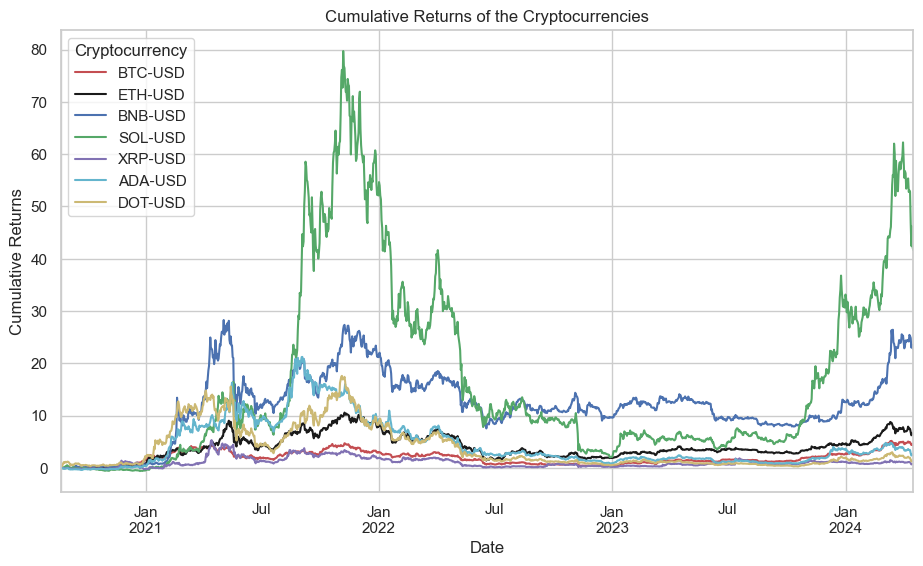

In [131]:
# Define colors for each cryptocurrency based on your subplot configuration
colors = ['r', 'k', 'b', 'g', 'm', 'c', 'y']  # 'y' added for DOT-USD as an example

# Plotting the daily cumulative returns with the specified colors
daily_cum_returns.plot(color=colors, figsize=(11, 6))

plt.title('Cumulative Returns of the Cryptocurrencies')
plt.xlabel('Date')  # Adding x-axis label for clarity
plt.ylabel('Cumulative Returns')  # Adding y-axis label for clarity
plt.legend(title='Cryptocurrency')  # Adding a legend with a title
plt.show()

#### Cryptocurrency price charts over the last 4 years

/var/folders/9m/wyctr7ld6vg0x1kjlmlh42hh0000gn/T/ipykernel_5018/3755266306.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()  # Adjust layout to fit subplots


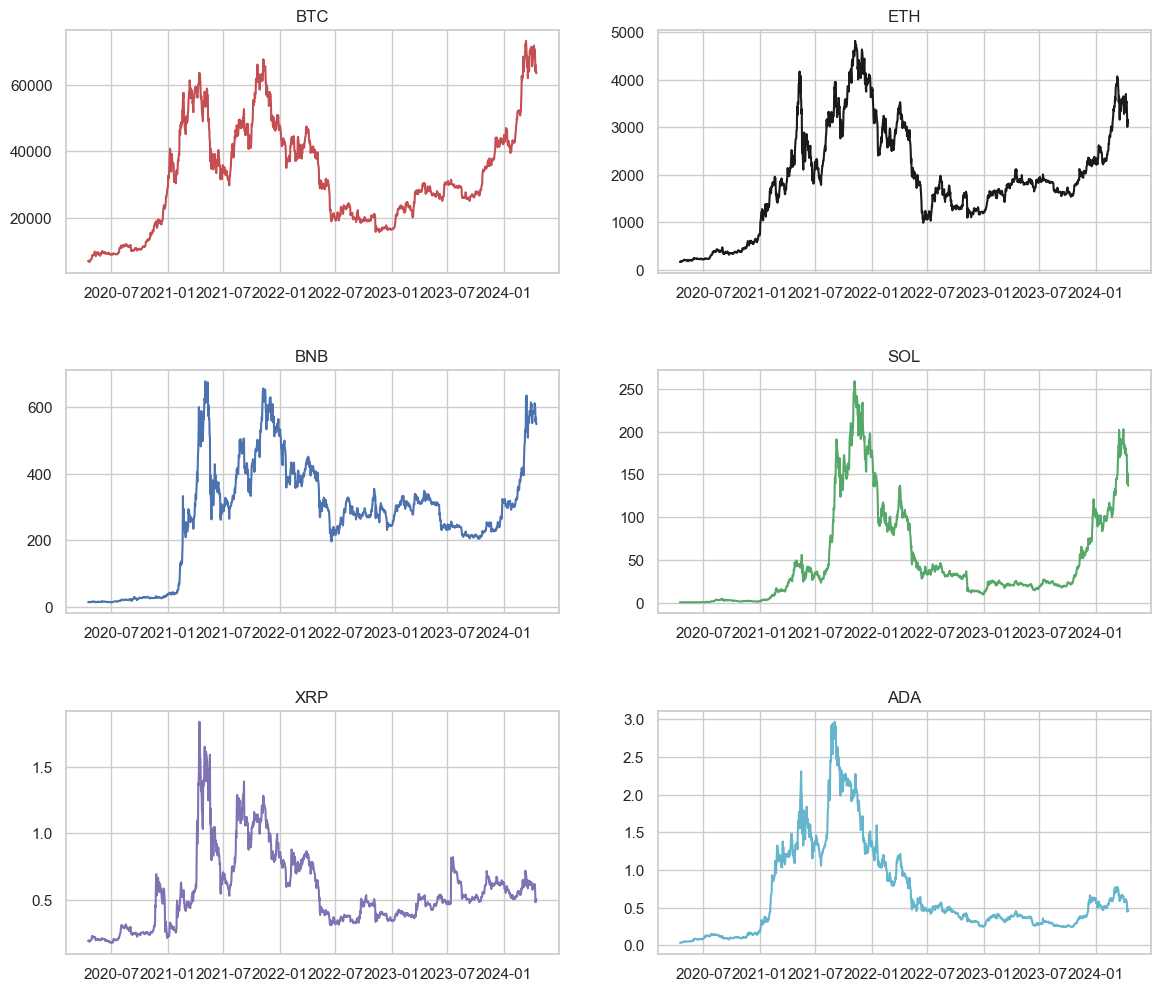

In [132]:
# Create a 3x2 grid of subplots
fig, axs = plt.subplots(3, 2, figsize=(14, 12), gridspec_kw={'hspace': 0.4, 'wspace': 0.2})

# Plotting BTC-USD on the first subplot
axs[0, 0].plot(df['Close']['BTC-USD'], color='r')
axs[0, 0].set_title('BTC')

# Plotting ETH-USD on the second subplot
axs[0, 1].plot(df['Close']['ETH-USD'], color='k')
axs[0, 1].set_title('ETH')

# Plotting BNB-USD on the third subplot
axs[1, 0].plot(df['Close']['BNB-USD'], color='b')
axs[1, 0].set_title('BNB')

# Plotting SOL-USD on the fourth subplot
axs[1, 1].plot(df['Close']['SOL-USD'], color='g')
axs[1, 1].set_title('SOL')

# Plotting XRP-USD on the fifth subplot
axs[2, 0].plot(df['Close']['XRP-USD'], color='m')  # using magenta for XRP
axs[2, 0].set_title('XRP')

# Plotting ADA-USD on the sixth subplot
axs[2, 1].plot(df['Close']['ADA-USD'], color='c')  # using cyan for ADA
axs[2, 1].set_title('ADA')

# Display the plot
plt.tight_layout()  # Adjust layout to fit subplots
plt.show()

### Comparison of daily volatilities

/var/folders/9m/wyctr7ld6vg0x1kjlmlh42hh0000gn/T/ipykernel_5018/2863947302.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()  # Adjust layout to fit subplots


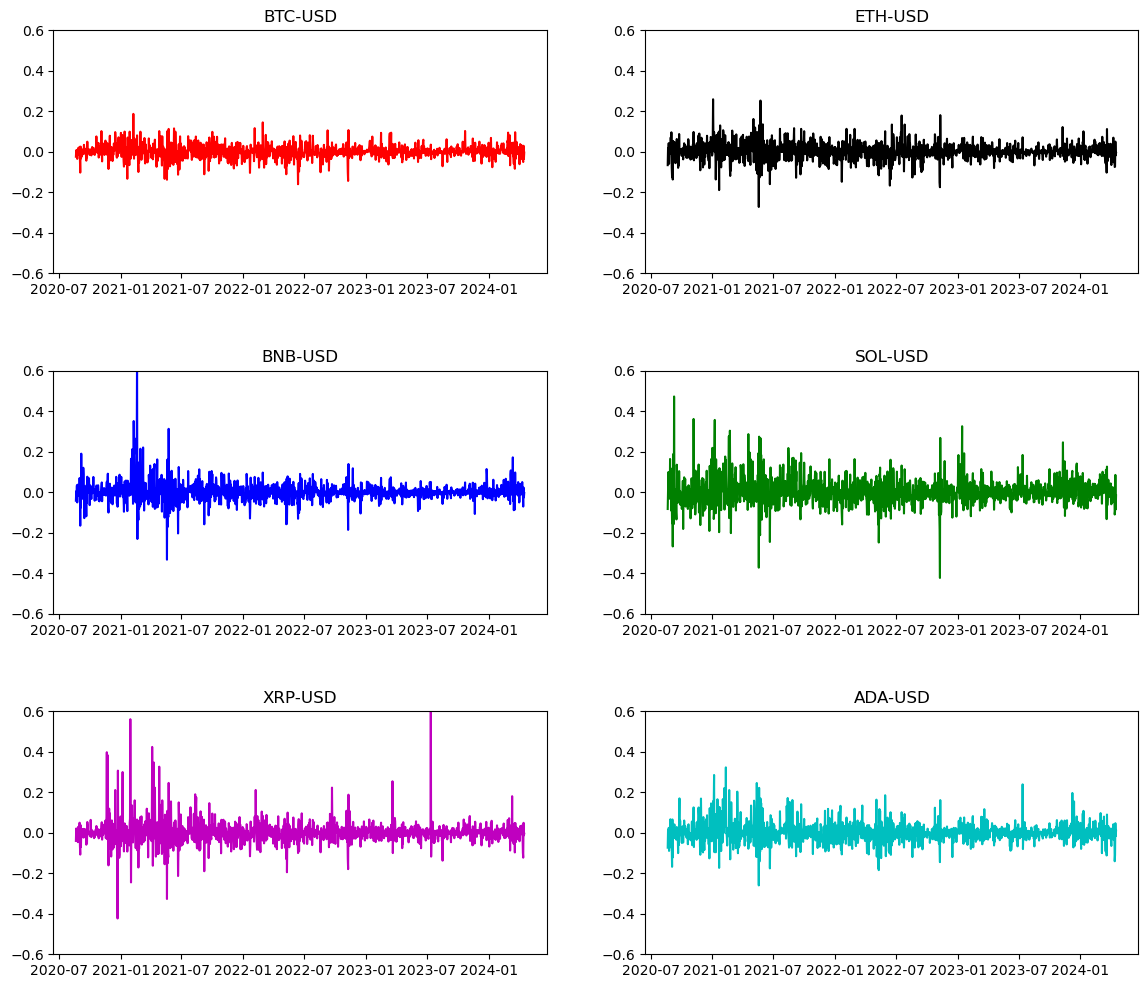

In [13]:
# Create a 3x2 grid of subplots
fig, axs = plt.subplots(3, 2, figsize=(14, 12), gridspec_kw={'hspace': 0.4, 'wspace': 0.2})

# Plotting BTC-USD on the first subplot
axs[0, 0].plot(daily_returns['BTC-USD'], color='r')
axs[0, 0].set_title('BTC-USD')
axs[0, 0].set_ylim([-0.6, 0.6])

# Plotting ETH-USD on the second subplot
axs[0, 1].plot(daily_returns['ETH-USD'], color='k')
axs[0, 1].set_title('ETH-USD')
axs[0, 1].set_ylim([-0.6, 0.6])

# Plotting BNB-USD on the third subplot
axs[1, 0].plot(daily_returns['BNB-USD'], color='b')
axs[1, 0].set_title('BNB-USD')
axs[1, 0].set_ylim([-0.6, 0.6])

# Plotting SOL-USD on the fourth subplot
axs[1, 1].plot(daily_returns['SOL-USD'], color='g')
axs[1, 1].set_title('SOL-USD')
axs[1, 1].set_ylim([-0.6, 0.6])

# Plotting XRP-USD on the fifth subplot
axs[2, 0].plot(daily_returns['XRP-USD'], color='m')  # using magenta for XRP
axs[2, 0].set_title('XRP-USD')
axs[2, 0].set_ylim([-0.6, 0.6])

# Plotting ADA-USD on the sixth subplot
axs[2, 1].plot(daily_returns['ADA-USD'], color='c')  # using cyan for ADA
axs[2, 1].set_title('ADA-USD')
axs[2, 1].set_ylim([-0.6, 0.6])

# Display the plot
plt.tight_layout()  # Adjust layout to fit subplots
plt.show()

### How are returns distributed?

/var/folders/9m/wyctr7ld6vg0x1kjlmlh42hh0000gn/T/ipykernel_5018/4054731488.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()  # Adjust layout to fit subplots


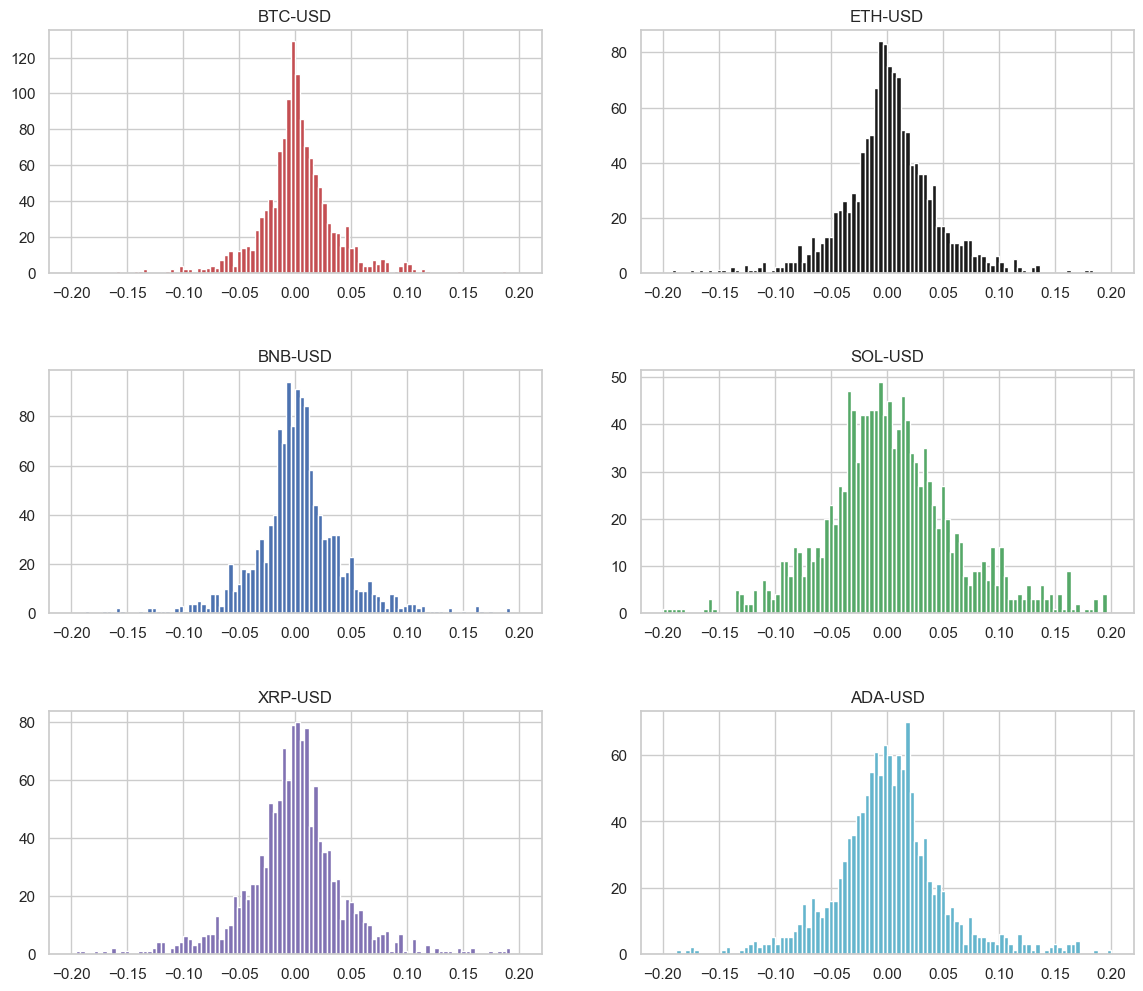

In [134]:
# Create a 3x2 grid of subplots
fig, axs = plt.subplots(3, 2, figsize=(14, 12), gridspec_kw={'hspace': 0.4, 'wspace': 0.2})

# Histogram for BTC-USD
axs[0, 0].hist(daily_returns['BTC-USD'], bins=100, color='r', range=(-0.2, 0.2))
axs[0, 0].set_title('BTC-USD')

# Histogram for ETH-USD
axs[0, 1].hist(daily_returns['ETH-USD'], bins=100, color='k', range=(-0.2, 0.2))
axs[0, 1].set_title('ETH-USD')

# Histogram for BNB-USD
axs[1, 0].hist(daily_returns['BNB-USD'], bins=100, color='b', range=(-0.2, 0.2))
axs[1, 0].set_title('BNB-USD')

# Histogram for SOL-USD
axs[1, 1].hist(daily_returns['SOL-USD'], bins=100, color='g', range=(-0.2, 0.2))
axs[1, 1].set_title('SOL-USD')

# Histogram for XRP-USD
axs[2, 0].hist(daily_returns['XRP-USD'], bins=100, color='m', range=(-0.2, 0.2))
axs[2, 0].set_title('XRP-USD')

# Histogram for ADA-USD
axs[2, 1].hist(daily_returns['ADA-USD'], bins=100, color='c', range=(-0.2, 0.2))
axs[2, 1].set_title('ADA-USD')

# Display the plot
plt.tight_layout()  # Adjust layout to fit subplots
plt.show()

/var/folders/9m/wyctr7ld6vg0x1kjlmlh42hh0000gn/T/ipykernel_5018/3709940690.py:18: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


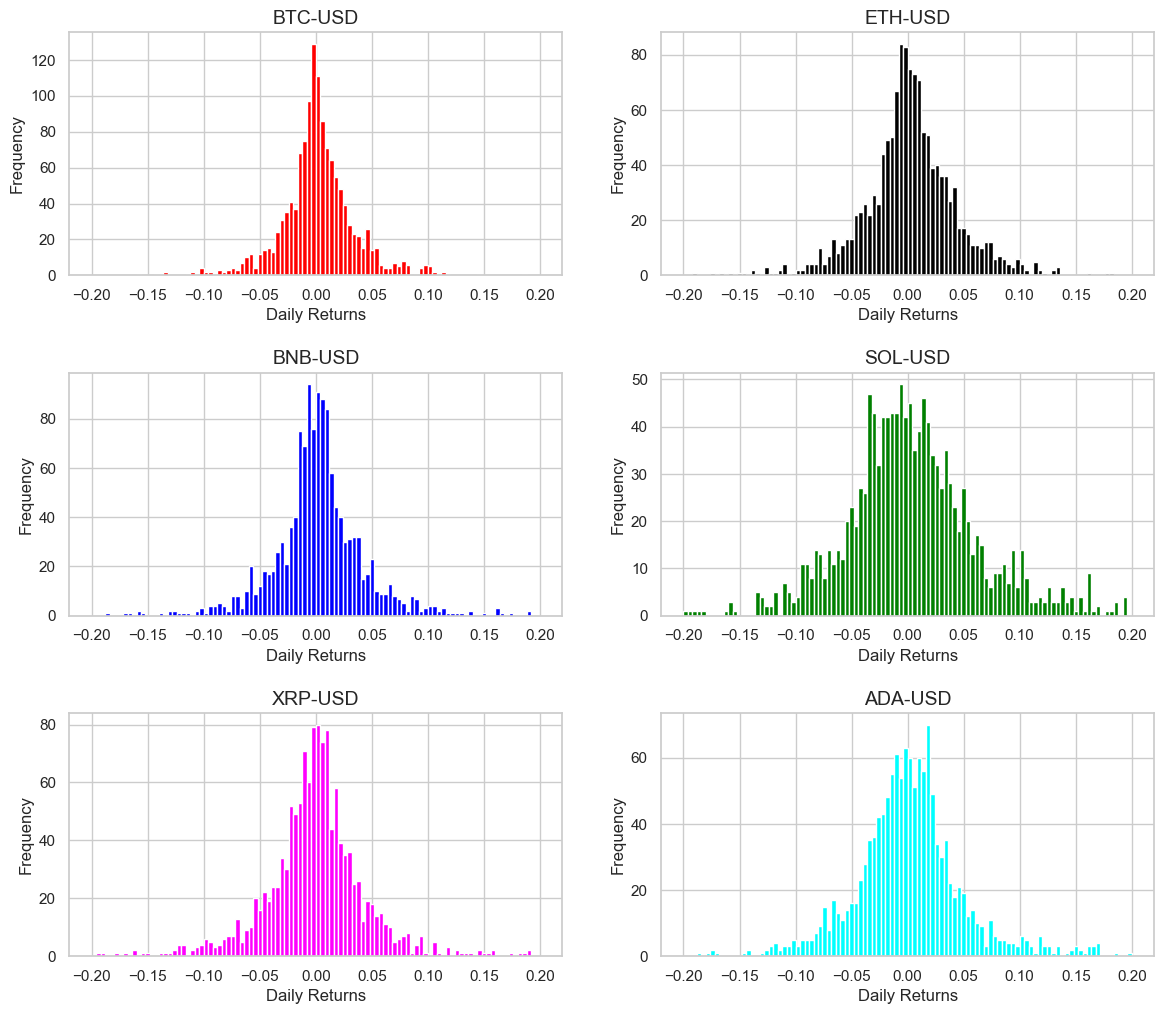

In [146]:
# Create a 3x2 grid of subplots
fig, axs = plt.subplots(3, 2, figsize=(14, 12), gridspec_kw={'hspace': 0.4, 'wspace': 0.2})

# Titles for each subplot
titles = ['BTC-USD', 'ETH-USD', 'BNB-USD', 'SOL-USD', 'XRP-USD', 'ADA-USD']
colors = ['red', 'black', 'blue', 'green', 'magenta', 'cyan']
cryptos = ['BTC-USD', 'ETH-USD', 'BNB-USD', 'SOL-USD', 'XRP-USD', 'ADA-USD']

# Loop through titles, colors, and cryptos to create each histogram
for ax, title, color, crypto in zip(axs.flat, titles, colors, cryptos):
    ax.hist(daily_returns[crypto], bins=100, color=color, range=(-0.2, 0.2))
    ax.set_title(title, fontsize=14)  # Setting title with a larger font size
    ax.set_xlabel('Daily Returns', fontsize=12)  # Set x-axis label
    ax.set_ylabel('Frequency', fontsize=12)  # Set y-axis label
    ax.grid(True)  # Enable grid

# Adjust layout to fit subplots and show plot
plt.tight_layout()
plt.show()

### Extreme returns

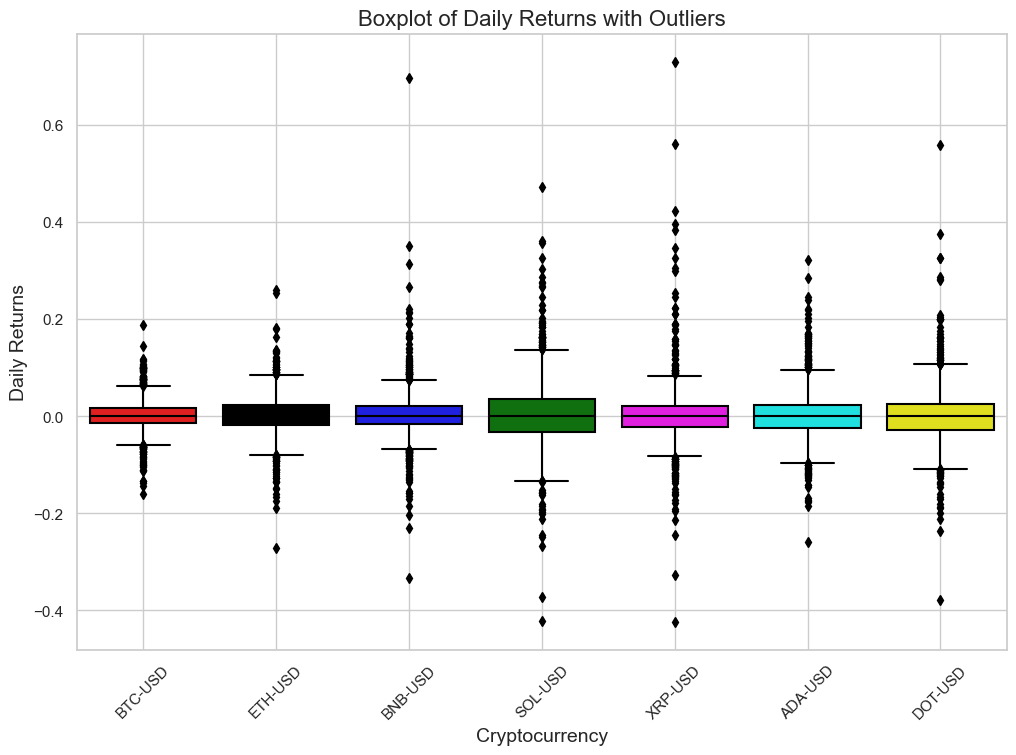

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt

# Custom colors for each cryptocurrency in the specified order
colors = ['red', 'black', 'blue', 'green', 'magenta', 'cyan', 'yellow']

# Creating a boxplot with Seaborn for better style control
plt.figure(figsize=(12, 8))  # Set the figure size for better visibility
sns.boxplot(data=daily_returns, palette=colors)

# Setting the title with an increased font size
plt.title('Boxplot of Daily Returns with Outliers', fontsize=16)

# Rotating the x-axis labels for better readability if there are many categories
plt.xticks(rotation=45)

# Setting labels with a larger font size
plt.xlabel('Cryptocurrency', fontsize=14)
plt.ylabel('Daily Returns', fontsize=14)

# Enabling a grid for easier analysis
plt.grid(True)

# Show the plot
plt.show()

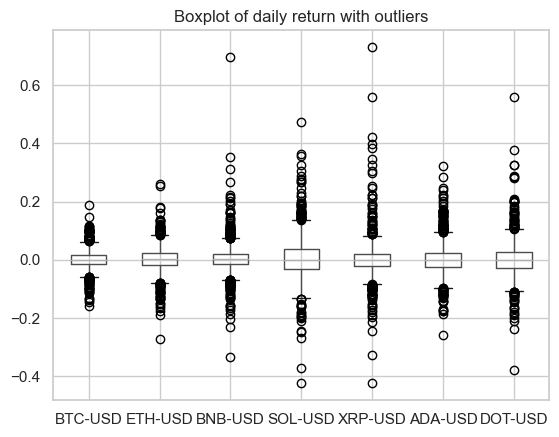

In [149]:
daily_returns.boxplot()
plt. title('Boxplot of daily return with outliers')
plt.show()

### Without outliers

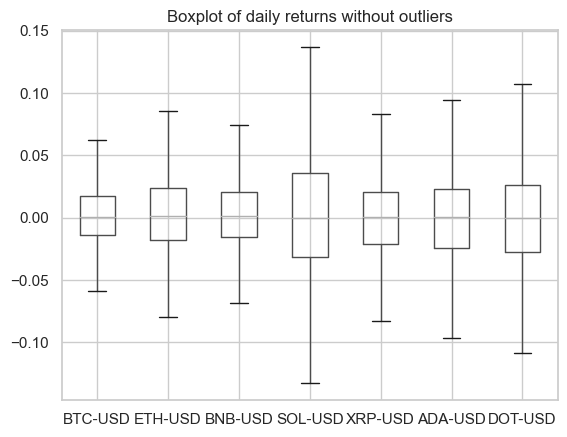

In [151]:
daily_returns.boxplot (showfliers=False)
plt. title('Boxplot of daily returns without outliers')
plt. show()

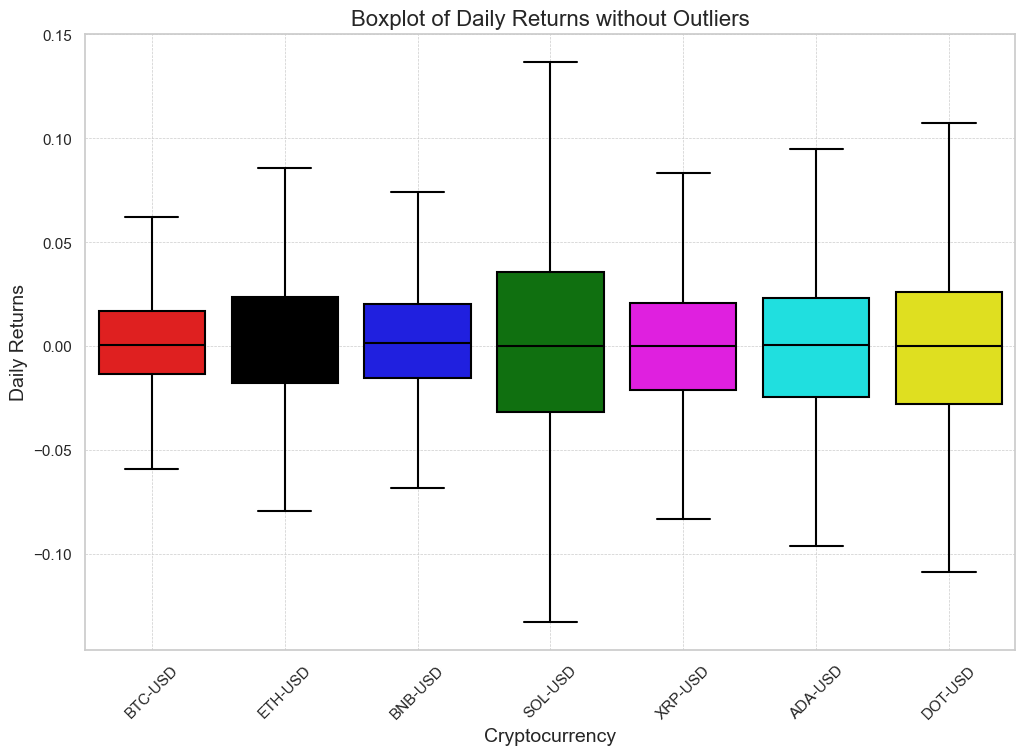

In [153]:
import seaborn as sns
import matplotlib.pyplot as plt

# Custom colors for each cryptocurrency in the specified order
colors = ['red', 'black', 'blue', 'green', 'magenta', 'cyan', 'yellow']

# Set a larger figure size for better visibility
plt.figure(figsize=(12, 8))

# Creating a boxplot with Seaborn, excluding outliers and using the custom colors
sns.boxplot(data=daily_returns, showfliers=False, palette=colors)

# Setting a title with increased font size for better readability
plt.title('Boxplot of Daily Returns without Outliers', fontsize=16)

# Rotating x-axis labels for better readability if there are many categories
plt.xticks(rotation=45)

# Labeling axes with larger font sizes
plt.xlabel('Cryptocurrency', fontsize=14)
plt.ylabel('Daily Returns', fontsize=14)

# Adding a grid for easier value reading
plt.grid(True, linestyle='--', linewidth=0.5)

# Show the plot
plt.show()

### Correlations of Cryptocurrencies

In [154]:
daily_returns.corr()

,BTC-USD,ETH-USD,BNB-USD,SOL-USD,XRP-USD,ADA-USD,DOT-USD
BTC-USD,1.000000,0.802317,0.619322,0.520271,0.528101,0.645683,0.641929
ETH-USD,0.802317,1.000000,0.638658,0.605096,0.562883,0.693631,0.698441
BNB-USD,0.619322,0.638658,1.000000,0.523752,0.469276,0.558904,0.564370
SOL-USD,0.520271,0.605096,0.523752,1.000000,0.437063,0.534984,0.537168
XRP-USD,0.528101,0.562883,0.469276,0.437063,1.000000,0.565590,0.485082
ADA-USD,0.645683,0.693631,0.558904,0.534984,0.565590,1.000000,0.654571
DOT-USD,0.641929,0.698441,0.564370,0.537168,0.485082,0.654571,1.000000


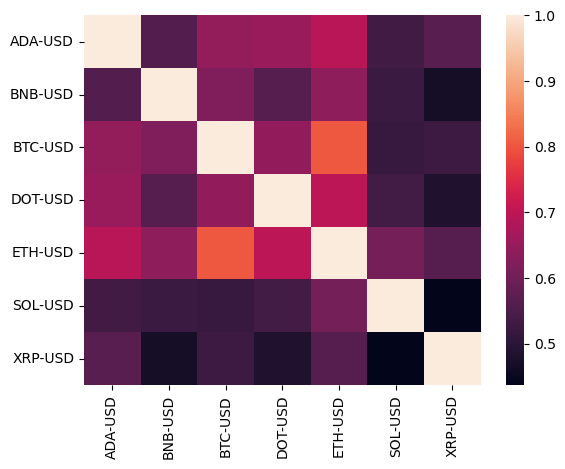

In [21]:
sns.heatmap(daily_returns.corr())
plt. show()

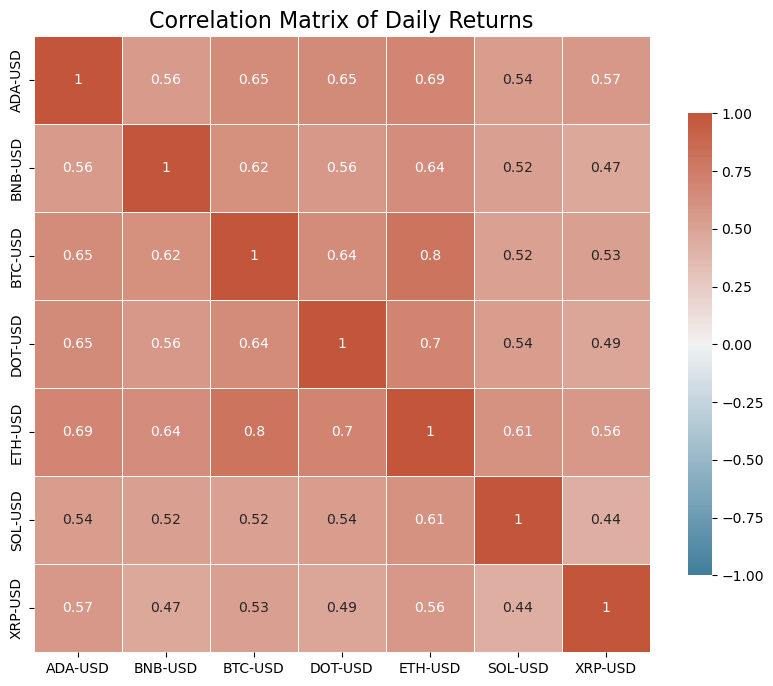

In [22]:
# Calculate the correlation matrix
corr = daily_returns.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, cmap=cmap, vmax=1.0, vmin=-1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .75})

# Adding title for clarity
plt.title('Correlation Matrix of Daily Returns', fontsize=16)

# Show the plot
plt.show()

### Let us backtest a forecasting module with Bitcoin
Let us travel back in time and see how a prediction would have performed

In [23]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [28]:
pip install python-dateutil

Note: you may need to restart the kernel to use updated packages.


In [29]:
from prophet import Prophet
import warnings
import datetime as dt
from dateutil.relativedelta import relativedelta  # Importing relativedelta

# Suppress future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Current end date
end = dt.datetime.now()

# Calculate dates: 1 year back, 6 months back, and 3 years back from 1 year back
end1 = dt.date(end.year - 1, end.month, end.day)  # 1 year back
end2 = end.date() - relativedelta(months=6)  # 6 months back using relativedelta
start1 = dt.date(end1.year - 3, end1.month, end1.day)  # 3 years back from 1 year back

# Print dates to verify
print("End Date 1 year back:", end1)
print("End Date 6 months back:", end2)
print("Start Date (3 years back from 1 year back):", start1)

End Date 1 year back: 2023-04-16
End Date 6 months back: 2023-10-16
Start Date (3 years back from 1 year back): 2020-04-16


In [44]:
# Fetch historical data for the cryptocurrencies
df1 = yf.download(crypto_list, start=start1, end=end1)['Adj Close']
df2 = yf.download(crypto_list, start=start1, end=end2)['Adj Close']

# Print only the 'Adj Close' data frames to check
print("\nData from start1 to end1 (Adj Close only):")
print(df1)
print("\nData from start1 to end2 (Adj Close only):")
print(df2)

[*********************100%%**********************]  7 of 7 completed
[*********************100%%**********************]  7 of 7 completed

Data from start1 to end1 (Adj Close only):
             ADA-USD     BNB-USD       BTC-USD   DOT-USD      ETH-USD  \
Date                                                                    
2020-04-16  0.034408   15.702730   7116.804199       NaN   172.157379   
2020-04-17  0.034573   15.735083   7096.184570       NaN   171.638580   
2020-04-18  0.036553   16.593172   7257.665039       NaN   186.914001   
2020-04-19  0.035816   16.139933   7189.424805       NaN   181.614960   
2020-04-20  0.034177   15.085403   6881.958496       NaN   172.297165   
...              ...         ...           ...       ...          ...   
2023-04-11  0.401456  322.758270  30235.058594  6.425752  1892.189697   
2023-04-12  0.406563  318.953766  30139.052734  6.415193  1920.682129   
2023-04-13  0.425759  324.948090  30399.066406  6.642448  2012.634644   
2023-04-14  0.4

In [59]:
from prophet import Prophet
import pandas as pd

# Fetch historical data for the cryptocurrencies
df1 = yf.download(crypto_list, start=start1, end=end1)['Adj Close']
df2 = yf.download(crypto_list, start=start1, end=end2)['Adj Close']

# Reset index of df1 dataframe
df1 = df1.reset_index()

# Reset index of df2 dataframe
df2 = df2.reset_index()

# Check if the 'Date' column exists in the dataframes
if 'Date' not in df1.columns:
    raise ValueError("The 'Date' column does not exist in the dataframe.")

# Rename the columns as required by Prophet
df1.rename(columns={'Date': 'ds', 'BTC-USD': 'y'}, inplace=True)
df2.rename(columns={'Date': 'ds', 'BTC-USD': 'y'}, inplace=True)

# Instantiate the Prophet model
model_fb1 = Prophet()

# Fit the Prophet model to the data
model_fb1.fit(df1)

[*********************100%%**********************]  7 of 7 completed
[*********************100%%**********************]  7 of 7 completed

09:13:16 - cmdstanpy - INFO - Chain [1] start processing


09:13:16 - cmdstanpy - INFO - Chain [1] done processing


In [60]:
from prophet import Prophet
import pandas as pd

# Fetch historical data for the cryptocurrencies
df1 = yf.download(crypto_list, start=start1, end=end1)['Adj Close']
df2 = yf.download(crypto_list, start=start1, end=end2)['Adj Close']

# Reset index of df1 dataframe
df1 = df1.reset_index()

# Reset index of df2 dataframe
df2 = df2.reset_index()

# Check if the 'Date' column exists in the dataframes
if 'Date' not in df2.columns:
    raise ValueError("The 'Date' column does not exist in the dataframe.")

# Rename the columns as required by Prophet
df1.rename(columns={'Date': 'ds', 'BTC-USD': 'y'}, inplace=True)
df2.rename(columns={'Date': 'ds', 'BTC-USD': 'y'}, inplace=True)

# Instantiate the Prophet model for the second dataframe
model_fb2 = Prophet()

# Fit the Prophet model to the data
model_fb2.fit(df2)

[*********************100%%**********************]  7 of 7 completed
[*********************100%%**********************]  7 of 7 completed

09:13:52 - cmdstanpy - INFO - Chain [1] start processing


09:13:53 - cmdstanpy - INFO - Chain [1] done processing


In [64]:
future = model_fb1.make_future_dataframe(periods=365)

In [65]:
future1 = model_fb2.make_future_dataframe(periods=180)

In [67]:
forecastl = model_fb1.predict(future)
forecast2 = model_fb2.predict(future1)

### 1 year prediciton would have failed

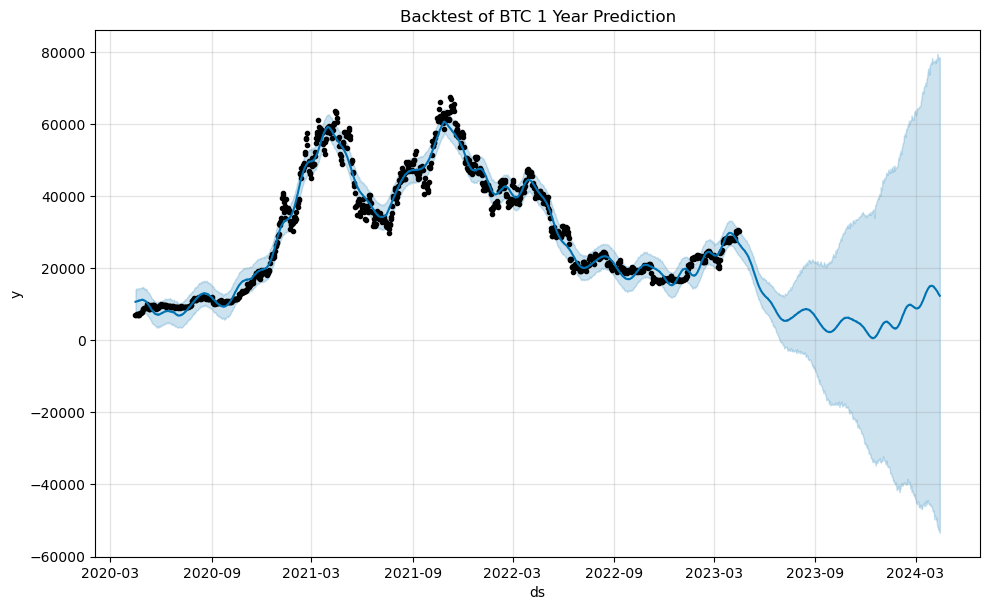

In [69]:
model_fb1. plot (forecastl)
plt.title('Backtest of BTC 1 Year Prediction')
plt. show()

### 6 Month Prediction would have performed very well

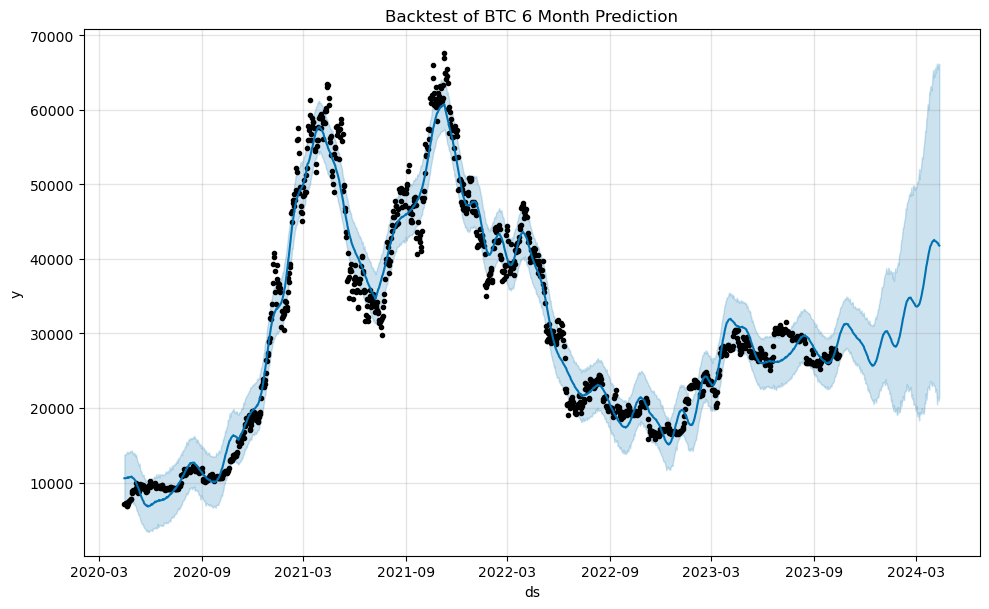

In [71]:
model_fb2. plot (forecast2)
plt.title('Backtest of BTC 6 Month Prediction' )
plt. show()

### Ok, where is BTC in 6 months from now on? Let's see us again in 6 Months and check if we got that right :-

In [76]:
from prophet import Prophet
import pandas as pd

# Fetch historical data for the cryptocurrencies
df1 = yf.download(crypto_list, start=start, end=end)['Adj Close']

# Instantiate the Prophet model
model_fb3 = Prophet()

# Reset index of df1 dataframe
df1 = df1.reset_index()

# Check if the 'Date' column exists in the dataframe
if 'Date' not in df1.columns:
    raise ValueError("The 'Date' column does not exist in the dataframe.")

# Rename the columns as required by Prophet
df1.rename(columns={'Date': 'ds', 'BTC-USD': 'y'}, inplace=True)

# Fit the Prophet model to the data
model_fb3.fit(df1)

[*********************100%%**********************]  7 of 7 completed

09:21:43 - cmdstanpy - INFO - Chain [1] start processing


09:21:43 - cmdstanpy - INFO - Chain [1] done processing


In [78]:
future3 = model_fb3.make_future_dataframe(periods=180)

In [79]:
forecast3 = model_fb3.predict(future3)

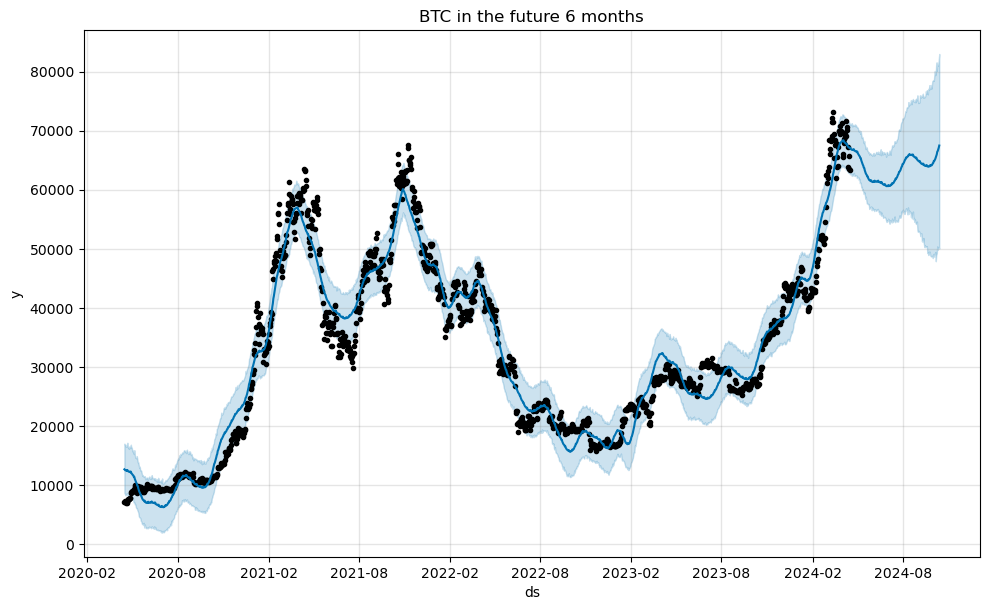

In [81]:
model_fb3. plot (forecast3)
plt.title('BTC in the future 6 months')
plt. show()

[*********************100%%**********************]  1 of 1 completed

09:41:49 - cmdstanpy - INFO - Chain [1] start processing


09:41:49 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 800x600 with 0 Axes>

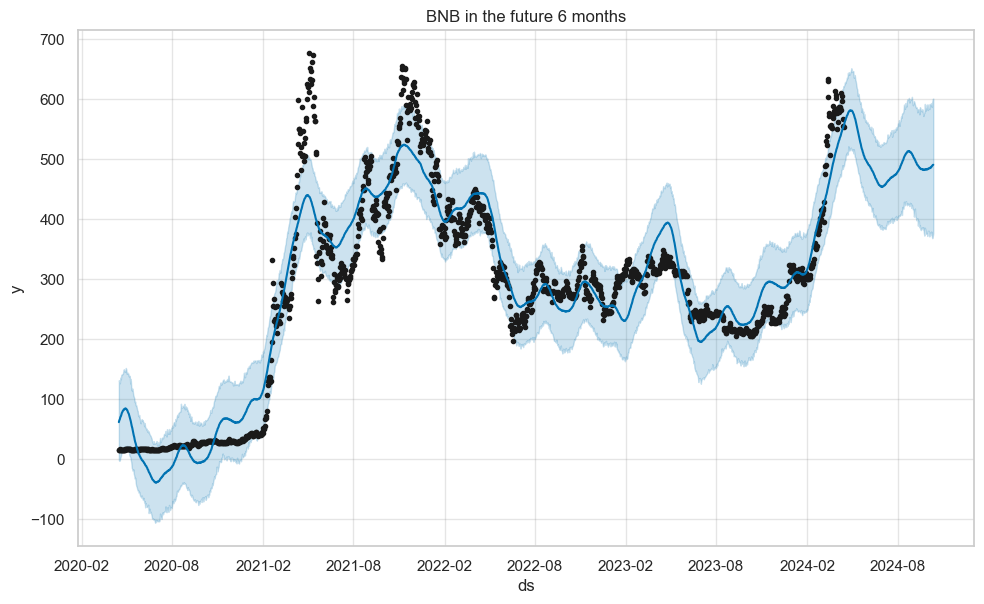

In [105]:
from prophet import Prophet
import pandas as pd

# Fetch historical data for BNB
df_bnb = yf.download('BNB-USD', start=start, end=end)['Adj Close']

# Instantiate the Prophet model for BNB
model_bnb = Prophet()

# Reset index of BNB dataframe
df_bnb = df_bnb.reset_index()

# Check if the 'Date' column exists in the BNB dataframe
if 'Date' not in df_bnb.columns:
    raise ValueError("The 'Date' column does not exist in the BNB dataframe.")

# Rename the columns as required by Prophet for BNB
df_bnb.rename(columns={'Date': 'ds', 'Adj Close': 'y'}, inplace=True)

# Fit the Prophet model to the data for BNB
model_bnb.fit(df_bnb)

# Generate future dataframe for BNB
future_bnb = model_bnb.make_future_dataframe(periods=180)

# Make predictions for BNB
forecast_bnb = model_bnb.predict(future_bnb)

# Plot the forecast for BNB
plt.figure(figsize=(8, 6))
model_bnb.plot(forecast_bnb)
plt.title('BNB in the future 6 months')
plt.show()

[*********************100%%**********************]  1 of 1 completed

09:42:19 - cmdstanpy - INFO - Chain [1] start processing


09:42:19 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 800x600 with 0 Axes>

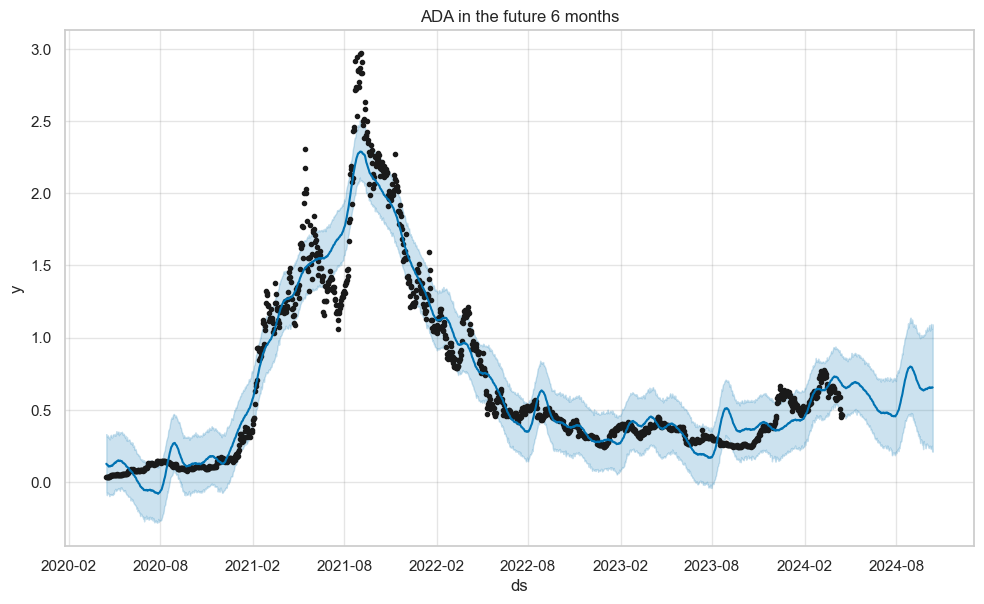

In [106]:
from prophet import Prophet
import pandas as pd

# Fetch historical data for ADA
df_ada = yf.download('ADA-USD', start=start, end=end)['Adj Close']

# Instantiate the Prophet model for ADA
model_ada = Prophet()

# Reset index of ADA dataframe
df_ada = df_ada.reset_index()

# Check if the 'Date' column exists in the ADA dataframe
if 'Date' not in df_ada.columns:
    raise ValueError("The 'Date' column does not exist in the ADA dataframe.")

# Rename the columns as required by Prophet for ADA
df_ada.rename(columns={'Date': 'ds', 'Adj Close': 'y'}, inplace=True)

# Fit the Prophet model to the data for ADA
model_ada.fit(df_ada)

# Generate future dataframe for ADA
future_ada = model_ada.make_future_dataframe(periods=180)

# Make predictions for ADA
forecast_ada = model_ada.predict(future_ada)

# Plot the forecast for ADA
plt.figure(figsize=(8, 6))
model_ada.plot(forecast_ada)
plt.title('ADA in the future 6 months')
plt.show()

[*********************100%%**********************]  1 of 1 completed

09:42:41 - cmdstanpy - INFO - Chain [1] start processing


09:42:42 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 800x600 with 0 Axes>

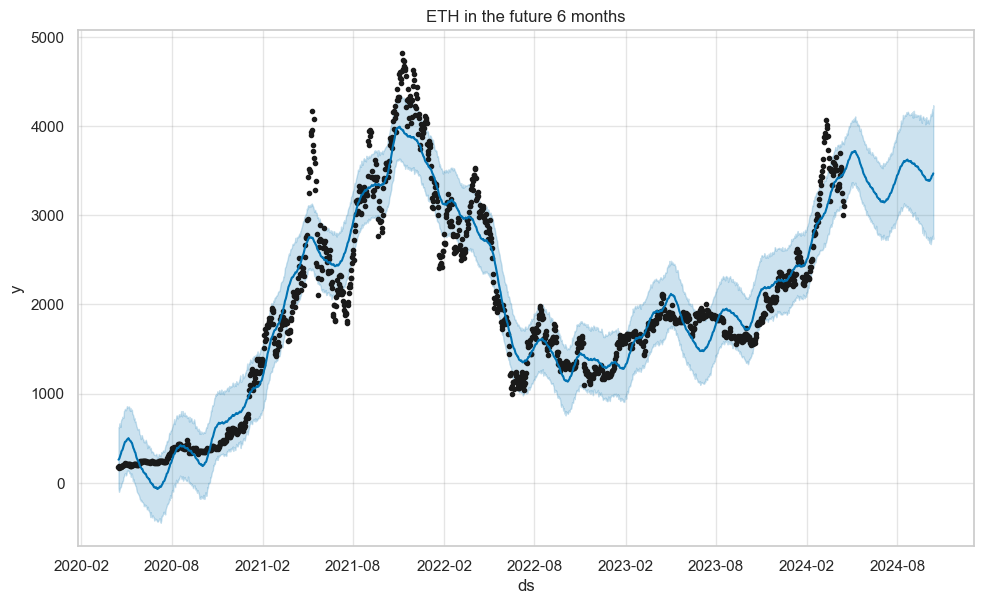

In [107]:
from prophet import Prophet
import pandas as pd

# Fetch historical data for ETH
df_eth = yf.download('ETH-USD', start=start, end=end)['Adj Close']

# Instantiate the Prophet model for ETH
model_eth = Prophet()

# Reset index of ETH dataframe
df_eth = df_eth.reset_index()

# Check if the 'Date' column exists in the ETH dataframe
if 'Date' not in df_eth.columns:
    raise ValueError("The 'Date' column does not exist in the ETH dataframe.")

# Rename the columns as required by Prophet for ETH
df_eth.rename(columns={'Date': 'ds', 'Adj Close': 'y'}, inplace=True)

# Fit the Prophet model to the data for ETH
model_eth.fit(df_eth)

# Generate future dataframe for ETH
future_eth = model_eth.make_future_dataframe(periods=180)

# Make predictions for ETH
forecast_eth = model_eth.predict(future_eth)

# Plot the forecast for ETH
plt.figure(figsize=(8, 6))
model_eth.plot(forecast_eth)
plt.title('ETH in the future 6 months')
plt.show()

[*********************100%%**********************]  1 of 1 completed

09:43:04 - cmdstanpy - INFO - Chain [1] start processing


09:43:04 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 800x600 with 0 Axes>

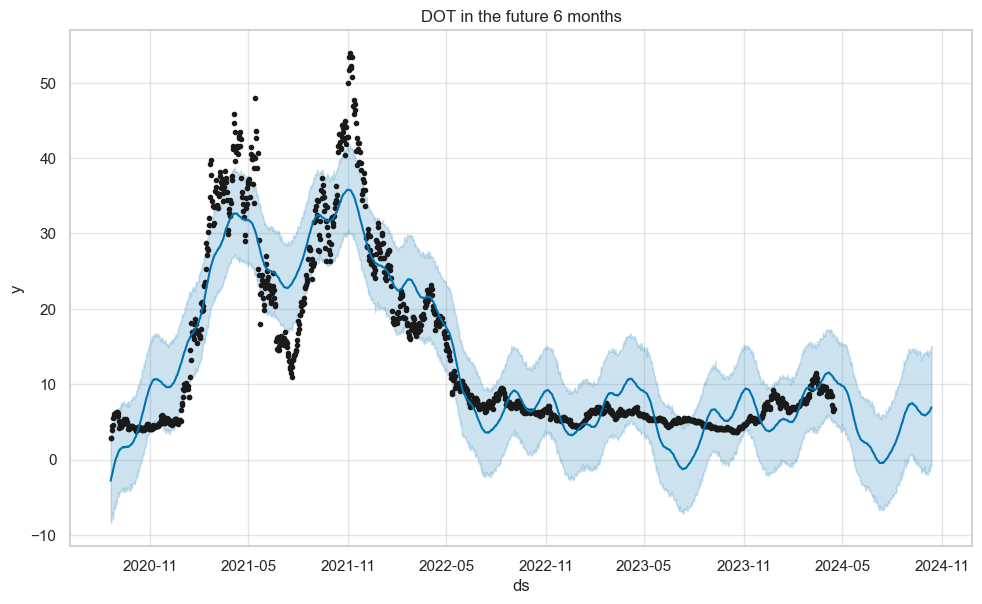

In [108]:
from prophet import Prophet
import pandas as pd

# Fetch historical data for DOT
df_dot = yf.download('DOT-USD', start=start, end=end)['Adj Close']

# Instantiate the Prophet model for DOT
model_dot = Prophet()

# Reset index of DOT dataframe
df_dot = df_dot.reset_index()

# Check if the 'Date' column exists in the DOT dataframe
if 'Date' not in df_dot.columns:
    raise ValueError("The 'Date' column does not exist in the DOT dataframe.")

# Rename the columns as required by Prophet for DOT
df_dot.rename(columns={'Date': 'ds', 'Adj Close': 'y'}, inplace=True)

# Fit the Prophet model to the data for DOT
model_dot.fit(df_dot)

# Generate future dataframe for DOT
future_dot = model_dot.make_future_dataframe(periods=180)

# Make predictions for DOT
forecast_dot = model_dot.predict(future_dot)

# Plot the forecast for DOT
plt.figure(figsize=(8, 6))
model_dot.plot(forecast_dot)
plt.title('DOT in the future 6 months')
plt.show()


[*********************100%%**********************]  1 of 1 completed

09:43:27 - cmdstanpy - INFO - Chain [1] start processing
09:43:27 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 800x600 with 0 Axes>

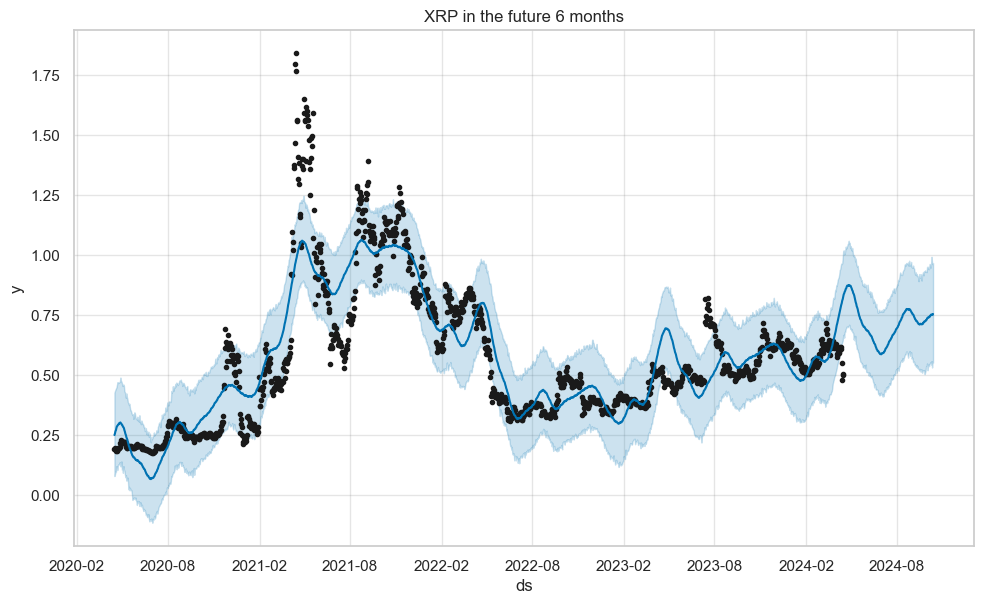

In [109]:
from prophet import Prophet
import pandas as pd

# Fetch historical data for XRP
df_xrp = yf.download('XRP-USD', start=start, end=end)['Adj Close']

# Instantiate the Prophet model for XRP
model_xrp = Prophet()

# Reset index of XRP dataframe
df_xrp = df_xrp.reset_index()

# Check if the 'Date' column exists in the XRP dataframe
if 'Date' not in df_xrp.columns:
    raise ValueError("The 'Date' column does not exist in the XRP dataframe.")

# Rename the columns as required by Prophet for XRP
df_xrp.rename(columns={'Date': 'ds', 'Adj Close': 'y'}, inplace=True)

# Fit the Prophet model to the data for XRP
model_xrp.fit(df_xrp)

# Generate future dataframe for XRP
future_xrp = model_xrp.make_future_dataframe(periods=180)

# Make predictions for XRP
forecast_xrp = model_xrp.predict(future_xrp)

# Plot the forecast for XRP
plt.figure(figsize=(8, 6))
model_xrp.plot(forecast_xrp)
plt.title('XRP in the future 6 months')
plt.show()

[*********************100%%**********************]  1 of 1 completed

09:43:37 - cmdstanpy - INFO - Chain [1] start processing


09:43:37 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 800x600 with 0 Axes>

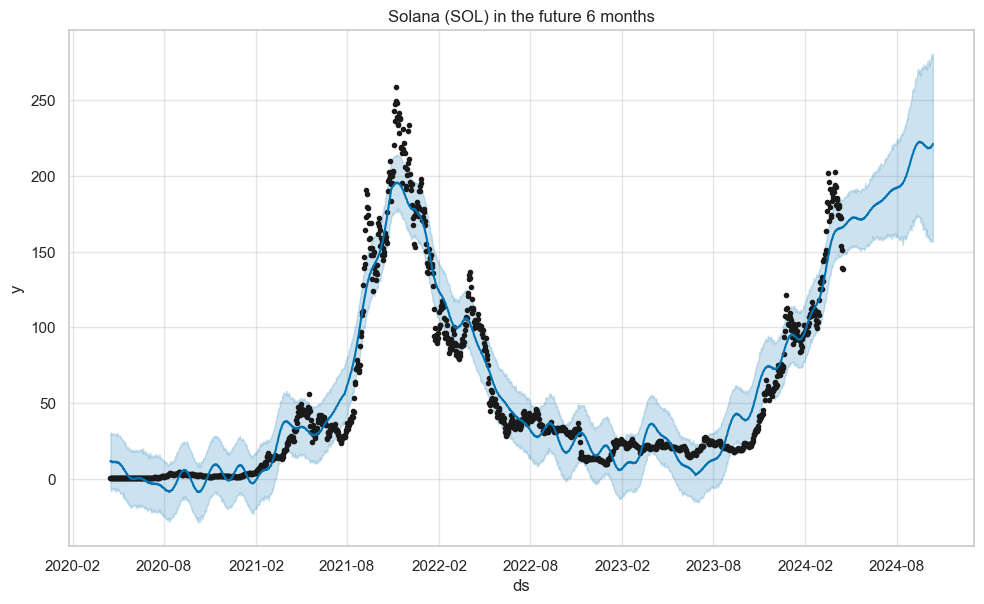

In [110]:
from prophet import Prophet
import pandas as pd

# Fetch historical data for Solana (SOL)
df_sol = yf.download('SOL-USD', start=start, end=end)['Adj Close']

# Instantiate the Prophet model for Solana (SOL)
model_sol = Prophet()

# Reset index of Solana (SOL) dataframe
df_sol = df_sol.reset_index()

# Check if the 'Date' column exists in the Solana (SOL) dataframe
if 'Date' not in df_sol.columns:
    raise ValueError("The 'Date' column does not exist in the Solana (SOL) dataframe.")

# Rename the columns as required by Prophet for Solana (SOL)
df_sol.rename(columns={'Date': 'ds', 'Adj Close': 'y'}, inplace=True)

# Fit the Prophet model to the data for Solana (SOL)
model_sol.fit(df_sol)

# Generate future dataframe for Solana (SOL)
future_sol = model_sol.make_future_dataframe(periods=180)

# Make predictions for Solana (SOL)
forecast_sol = model_sol.predict(future_sol)

# Plot the forecast for Solana (SOL)
plt.figure(figsize=(8, 6))
model_sol.plot(forecast_sol)
plt.title('Solana (SOL) in the future 6 months')
plt.show()

### Do Cryptocurrency returns explain each other?

In [85]:
import statsmodels.api as sm

# Define dependent variable y and independent variables X1, X2, X3, X4, X5, X6
y = daily_returns['BTC-USD']
X1 = daily_returns[['ETH-USD']]
X2 = daily_returns[['ETH-USD', 'XRP-USD']]
X3 = daily_returns[['ETH-USD', 'XRP-USD', 'ADA-USD']]
X4 = daily_returns[['ETH-USD', 'XRP-USD', 'ADA-USD', 'BNB-USD']]
X5 = daily_returns[['ETH-USD', 'XRP-USD', 'ADA-USD', 'BNB-USD', 'DOT-USD']]
X6 = daily_returns[['ETH-USD', 'XRP-USD', 'ADA-USD', 'BNB-USD', 'DOT-USD', 'SOL-USD']]

# Add a constant term to the independent variables
X1 = sm.add_constant(X1)
X2 = sm.add_constant(X2)
X3 = sm.add_constant(X3)
X4 = sm.add_constant(X4)
X5 = sm.add_constant(X5)
X6 = sm.add_constant(X6)

# Fit OLS models
model1 = sm.OLS(y, X1)
model2 = sm.OLS(y, X2)
model3 = sm.OLS(y, X3)
model4 = sm.OLS(y, X4)
model5 = sm.OLS(y, X5)
model6 = sm.OLS(y, X6)

# Obtain the results
results1 = model1.fit()
results2 = model2.fit()
results3 = model3.fit()
results4 = model4.fit()
results5 = model5.fit()
results6 = model6.fit()

In [88]:
# Create a DataFrame to store the results
ols_table = pd.DataFrame({
    'Model': ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6'],
    'Independent Variables': ['ETH-USD', 'ETH-USD, XRP-USD', 'ETH-USD, XRP-USD, ADA-USD', 
                              'ETH-USD, XRP-USD, ADA-USD, BNB-USD', 
                              'ETH-USD, XRP-USD, ADA-USD, BNB-USD, DOT-USD', 
                              'ETH-USD, XRP-USD, ADA-USD, BNB-USD, DOT-USD, SOL-USD'],
    'R-squared': [results1.rsquared, results2.rsquared, results3.rsquared, results4.rsquared, results5.rsquared, results6.rsquared],
    'Adj R-squared': [results1.rsquared_adj, results2.rsquared_adj, results3.rsquared_adj, results4.rsquared_adj, results5.rsquared_adj, results6.rsquared_adj],
    'F-statistic': [results1.fvalue, results2.fvalue, results3.fvalue, results4.fvalue, results5.fvalue, results6.fvalue],
    'Prob (F-statistic)': [results1.f_pvalue, results2.f_pvalue, results3.f_pvalue, results4.f_pvalue, results5.f_pvalue, results6.f_pvalue],
    'AIC': [results1.aic, results2.aic, results3.aic, results4.aic, results5.aic, results6.aic],
    'BIC': [results1.bic, results2.bic, results3.bic, results4.bic, results5.bic, results6.bic]
})

# Display the OLS table
print(ols_table)

     Model                              Independent Variables  R-squared  \
0  Model 1                                            ETH-USD   0.643720   
1  Model 2                                   ETH-USD, XRP-USD   0.652284   
2  Model 3                          ETH-USD, XRP-USD, ADA-USD   0.662488   
3  Model 4                 ETH-USD, XRP-USD, ADA-USD, BNB-USD   0.674460   
4  Model 5        ETH-USD, XRP-USD, ADA-USD, BNB-USD, DOT-USD   0.677810   
5  Model 6  ETH-USD, XRP-USD, ADA-USD, BNB-USD, DOT-USD, S...   0.677977   

   Adj R-squared  F-statistic  Prob (F-statistic)          AIC          BIC  
0       0.643453  2408.442796       5.054091e-301 -6676.120549 -6665.727176  
1       0.651762  1249.357274       2.854124e-306 -6706.601779 -6691.011719  
2       0.661728   870.855507       2.826710e-313 -6744.365025 -6723.578279  
3       0.673481   688.878945       3.409053e-322 -6790.577291 -6764.593858  
4       0.676598   559.178591       9.881313e-324 -6802.386864 -6771.206745  

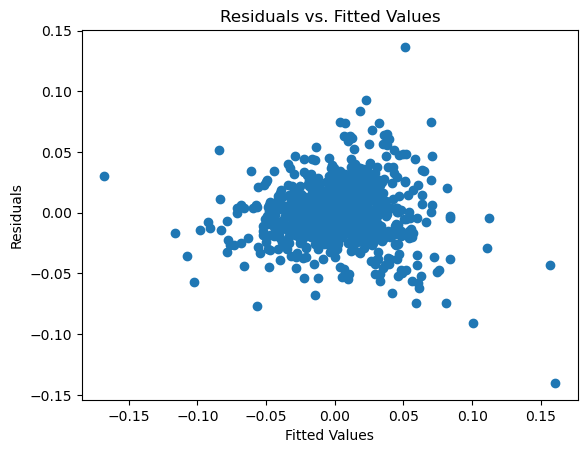

In [91]:
import matplotlib.pyplot as plt

plt.scatter(results1.fittedvalues, results1.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

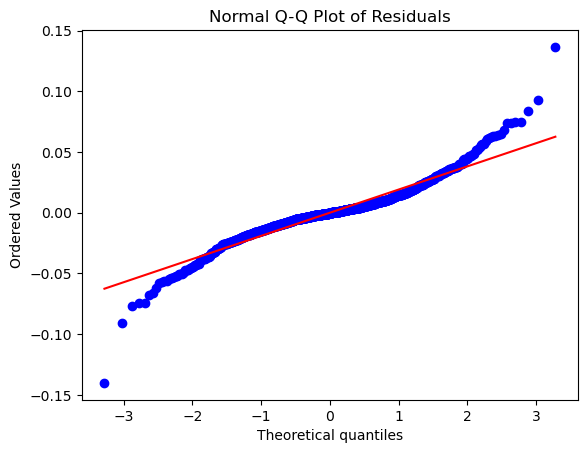

In [92]:
import scipy.stats as stats
import matplotlib.pyplot as plt

residuals = results1.resid
fig, ax = plt.subplots()
stats.probplot(residuals, dist="norm", plot=ax)
ax.set_title('Normal Q-Q Plot of Residuals')
plt.show()